## Introduction
This article describes how to test your algorithmic trading strategy on a portfolio of stocks. A portfolio reduces risk as opposed to just applying a strategy to a single stock. Optimizing the portfolio can result in higher returns and reduce overall risk (Increases Sharpe Ratio).

I highly recommend you do go through my previous articles to get a better grasp on this article.
- Backtesting a strategy in python
- BUY LOW SELL HIGH strategy back-testing in python
- Optimizing strategies in python

### Steps to be followed
1. Get the tools 
2. Create necessary functions to be applied to the portfolio
3. Apply the strategy on portfolio stocks and generate positions
4. Result and plots

#### Step 1. Get the tools 
Import the necessary libraries. 
Yfinance is used to download historical OHLCV data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
import nsepy
from statistics import mean

#### Step 2.  Create necessary functions to be applied to the portfolio
In this step, we create various functions that might have to be called on all the stocks.
This might help us encapsulate this functionality into a class later. (if and when needed)
The following functions are created
- Getting daily data
- Moving average strategy function
- Calculating cumulative returns
- Calculating annualized share

In [2]:
# get daily data from yfinance
def get_daily_data(symbol, start, end):
    data = yf.download(tickers=symbol, start=start, end=end)
    # data = nsepy.get_history(symbol=symbol, start=start, end=end)
    return data

# moving averages strategy on close price data
# [!] implement any strategy you like across all stocks in your portfolio
def ma(data,ma1,ma2):
    # calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['Close'].ewm(span=ma2).mean().shift()

    # creating positions
    # data["position"] = [0]*len(data)
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["bnh_returns"] * data["position"]
    
    # returning strategy returns
    return data["strategy_returns"]

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

#  Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

#### Step 3. Apply the strategy on portfolio stocks and generate positions
In this step, we define the portfolio and iterate over the stocks in it, squentially download the data and apply the moving averages strategy.

In [3]:
# backtesting parameters
days = 2000
end = dt.today()
start = end - pd.Timedelta(days=days)

# portfolio of stocks
portfolio_stocks = ["COST","AMZN","GOOG","AXP","MSFT","MMM","ANSS","BBY","KO"]

# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_bnh_returns = pd.DataFrame()

# buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

# iterating over stocks in the portfolio
for stock in portfolio_stocks:
    data = get_daily_data(stock, start, end)
    
    # Calcuulating daily returns
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())
    
    portfolio_strategy_returns[stock] = ma(data,ma1 = 3, ma2 = 8)
    
    bnh_stock_returns.append(get_cumulative_return(data["strategy_returns"]))
    bnh_stock_sharpe.append(get_annualized_sharpe_ratio(data["strategy_returns"]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,COST,AMZN,GOOG,AXP,MSFT,MMM,ANSS,BBY,KO,Portfolio_rets
Date,,,,,,,,,,
2019-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
2019-06-11,0.0010,0.0016,-0.0015,0.0046,-0.0038,0.0037,-0.0014,0.0050,-0.0000,0.0010
2019-06-12,0.0005,-0.0045,-0.0016,-0.0098,-0.0046,0.0006,0.0151,-0.0165,0.0000,-0.0023
2019-06-13,0.0096,0.0080,0.0108,-0.0014,0.0000,-0.0009,0.0035,0.0213,-0.0099,0.0046
2019-06-14,0.0017,-0.0003,-0.0031,0.0000,0.0010,-0.0129,-0.0068,0.0029,0.0000,-0.0020
2019-06-17,0.0049,0.0087,0.0066,-0.0000,0.0030,0.0000,0.0080,0.0090,-0.0000,0.0045
2019-06-18,0.0050,0.0081,0.0101,0.0000,0.0172,0.0000,0.0158,0.0299,-0.0000,0.0096
2019-06-19,0.0035,0.0039,-0.0012,0.0101,0.0039,-0.0065,0.0106,-0.0151,0.0000,0.0010


#### Step 4. Result and plots
In this step, the cumulative returns and annualized Sharpe ratio is compared with the individual stock performance. It can be observed visually from the plot that the portfolio has little variation as compared to the individual stock performance. The mean annualized Sharpe ratio for individual stocks is about 0.38 whereas the annualized Sharpe ratio for the portfolio is 0.72. This shows how investing in a portfolio of stocks can reduce risk. A higher return can be obtained by optimizing the portfolio using various techniques like CAMP (Capital Asset Pricing Model) and Kelly's criterion.

In [5]:

perf = pd.DataFrame(index=portfolio_stocks,columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(portfolio_stocks):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]
    
perf

,Cumulative returns,Annualized Sharpe Ratio
COST,0.703916,0.791072
AMZN,0.272611,0.21373
GOOG,0.178052,0.147356
AXP,0.784497,0.613782
MSFT,0.442572,0.416535
MMM,0.207311,0.216133
ANSS,-0.203826,-0.164665
BBY,-0.245131,-0.173769
KO,0.108102,0.148012


In [6]:
perf.mean()

Cumulative returns         0.249789
Annualized Sharpe Ratio    0.245354
dtype: object

In [7]:
print("Cumulative returns MA Stretegy                  :",get_cumulative_return(portfolio_strategy_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Strategy             :",get_annualized_sharpe_ratio(portfolio_strategy_returns["Portfolio_rets"]))
print("\n")

Cumulative returns MA Stretegy                  : 0.24978932271391702
Annualized sharpe ratio MA Strategy             : 0.3943177775519369




<AxesSubplot:title={'center':'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}, xlabel='Date'>

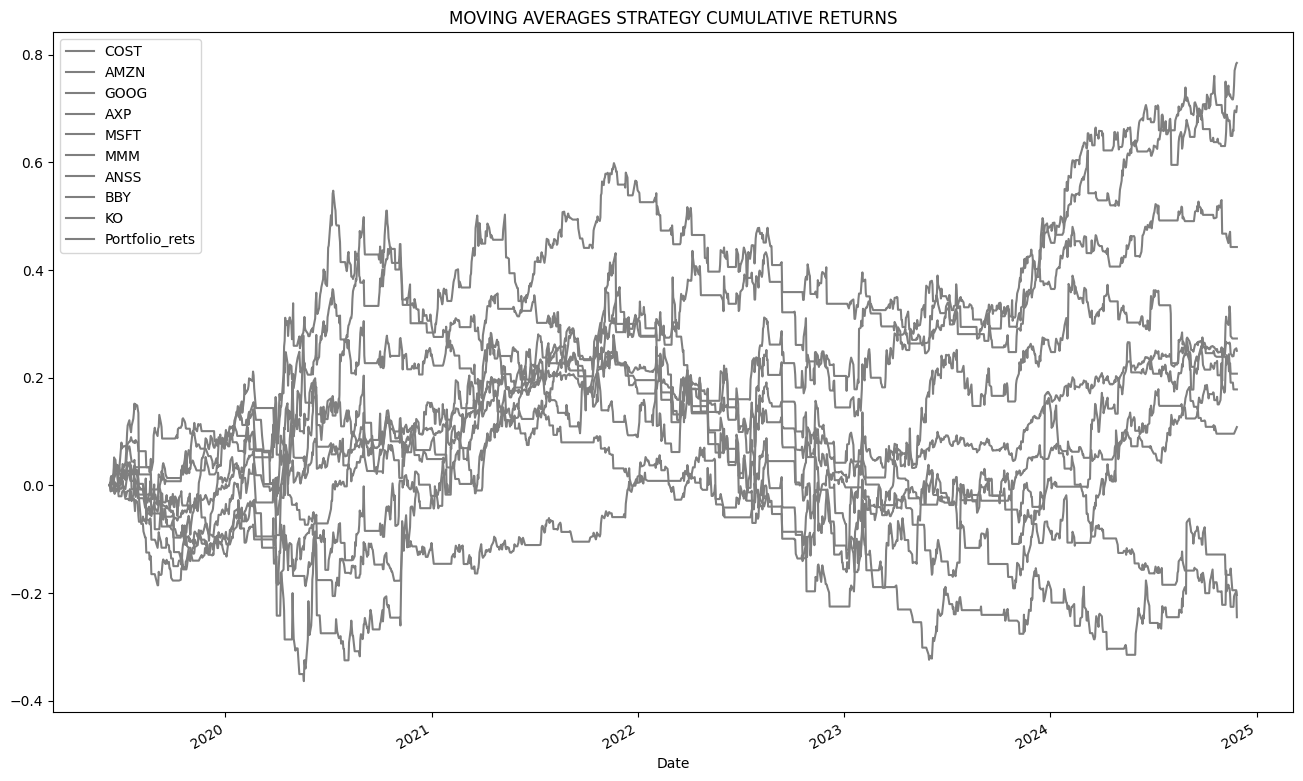

In [8]:
colors = ['tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray','tab:gray',"k"]
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)